In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [52]:
# udg_cat = Table.read('/tigress/jiaxuanl/public_html/galary/catalogs/nsa_z001_004/udg_z001_004_spergel_after_viz.fits')

In [3]:
dist = udg_cat['host_ang_diam_dist'].data
dist = np.random.choice(dist, size=(4000))

In [4]:
R_e = np.random.uniform(2, 10, len(dist))

In [5]:
from scipy.stats import truncnorm

In [6]:
def trunc_norm(a, b, loc, sigma):
    return truncnorm((a - loc) / sigma, (b - loc) / sigma, loc=loc, scale=sigma)

In [43]:
lower = 0.2
higher = 1.1
mean = 0.5
std = 0.2
gi_color = trunc_norm(lower, higher, mean, std).rvs(len(dist))
# gi_color = np.random.uniform(lower, higher, len(dist))
# average over g-i and g-r results
log_ML_g = (1.297 * gi_color - 0.855)

(array([336., 538., 707., 751., 688., 491., 274., 140.,  49.,  26.]),
 array([0.20044967, 0.29015721, 0.37986476, 0.4695723 , 0.55927984,
        0.64898738, 0.73869492, 0.82840246, 0.91811   , 1.00781754,
        1.09752509]),
 <BarContainer object of 10 artists>)

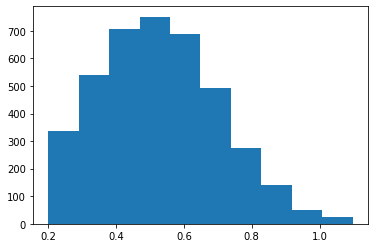

In [44]:
plt.hist(gi_color)

In [45]:
# M_g = -0.4 * (g_abs - 5.03) + log_ML_g

In [46]:
# M_g = np.random.uniform(6, 9, len(dist)) # stellar mass
M_g = trunc_norm(6, 9, 10, 2).rvs(len(dist)) # stellar mass
g_abs = (M_g - log_ML_g) / (-0.4) + 5.03
g_mag = g_abs + 25 + 5 * np.log10(dist)
SB_eff_avg = g_mag + 2.5 * np.log10(2 * np.pi * R_e**2)
R_e_phys = R_e / 206265 * dist * 1000

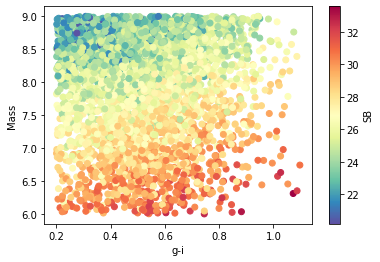

In [47]:
plt.scatter(gi_color, M_g, c=SB_eff_avg, cmap='Spectral_r')
plt.xlabel('g-i')
plt.ylabel('Mass')
plt.colorbar(label='SB')

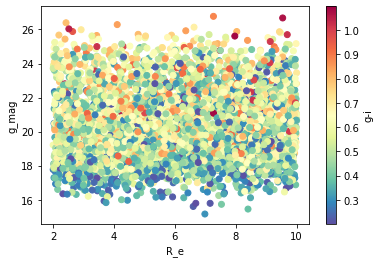

In [48]:
plt.scatter(R_e, g_mag, c=gi_color, cmap='Spectral_r')
plt.xlabel('R_e')
plt.ylabel('g_mag')
plt.colorbar(label='g-i')

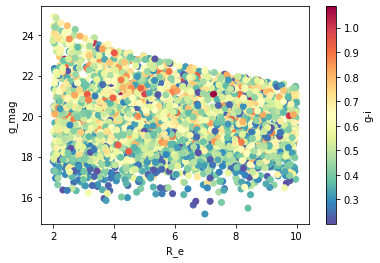

In [49]:
plt.scatter(R_e[SB_eff_avg < 28.5], 
            g_mag[SB_eff_avg < 28.5], 
            c=gi_color[SB_eff_avg < 28.5], 
            cmap='Spectral_r')
plt.xlabel('R_e')
plt.ylabel('g_mag')
plt.colorbar(label='g-i')

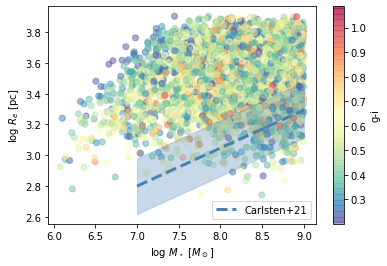

In [50]:
import matplotlib
from matplotlib.colors import Normalize

# norm = Normalize(vmin=2, vmax=15)
# cmap = matplotlib.cm.Spectral_r
# sm = matplotlib.cm.ScalarMappable(norm, cmap)
# sm.set_array([])
# _colors = sm.to_rgba(R_e)
# norm = Normalize(vmin=0.1, vmax=1.1)
# cmap = matplotlib.cm.Spectral_r
# sm = matplotlib.cm.ScalarMappable(norm, cmap)
# sm.set_array([])
# _colors = sm.to_rgba(gi_color)

sct = plt.scatter(
        M_g[SB_eff_avg < 28.5], 
        np.log10(R_e_phys)[SB_eff_avg < 28.5] + 3, # in pc
#         xerr=M_g_std[i],
#         yerr=yerrs[:, i].reshape(-1, 1),
        c=gi_color[SB_eff_avg < 28.5],
#         fmt='o', 
        alpha=0.5, cmap='Spectral_r')
plt.colorbar(sct, label='g-i')

# Carlsten mass-size relation
def mass_size_carlsten(log_m):
    return 1.071 + 0.247 * log_m
x = np.linspace(7, 9)
plt.fill_between(x, mass_size_carlsten(x) - 0.181, 
                 mass_size_carlsten(x) + 0.181, 
                 color='steelblue', alpha=0.3)
plt.plot(x, mass_size_carlsten(x), ls='--', 
         color='steelblue', lw=3, label='Carlsten+21')

plt.xlabel(r'$\log\ M_\star\ [M_\odot]$')
plt.ylabel(r'$\log\ R_{e}\ [\rm pc]$')
plt.legend(loc='lower right')

# plt.xlim(6.8, 9.2)

Text(0, 0.5, 'Quenched Fraction ($g - i > 0.8$)')

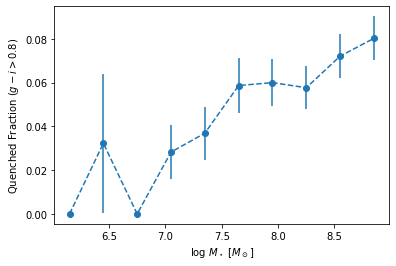

In [51]:
from scipy.stats import binned_statistic
red = (gi_color > 0.8)
quench_frac, edges, _ = binned_statistic(M_g[SB_eff_avg < 28.5], red.astype(float)[SB_eff_avg < 28.5], 
                                             statistic='mean', range=(6, 9), bins=10)
num, edges, _ = binned_statistic(M_g[SB_eff_avg < 28.5], red.astype(float)[SB_eff_avg < 28.5], 
                                             statistic='count', range=(6, 9), bins=10)

plt.errorbar((edges[:-1] + edges[1:]) / 2, 
             quench_frac, yerr=np.sqrt(quench_frac * (1 - quench_frac) / num), fmt='o--')
plt.xlabel(r'$\log\ M_\star\ [M_\odot]$')
plt.ylabel(r'Quenched Fraction ($g - i > 0.8$)')

(array([212., 185., 193., 193., 205., 192., 186., 204., 229., 201.]),
 array([24.40250201, 24.91182163, 25.42114125, 25.93046086, 26.43978048,
        26.94910009, 27.45841971, 27.96773933, 28.47705894, 28.98637856,
        29.49569817]),
 <BarContainer object of 10 artists>)

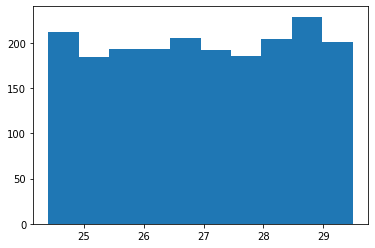

In [9]:
lower = 24.4
higher = 29.5
mean = 24.
std = 1.5
SB_eff_avg = np.random.uniform(lower, higher, len(dist))
# SB_eff_avg = truncnorm((lower - mean) / std, (higher - mean) / std, loc=mean, scale=std).rvs(len(dist))
plt.hist(SB_eff_avg)

In [10]:
g_mag = SB_eff_avg - 2.5 * np.log10(2 * np.pi * R_e**2)

(array([ 93., 171., 274., 314., 298., 315., 256., 145.,  99.,  35.]),
 array([17.58343448, 18.40079521, 19.21815593, 20.03551666, 20.85287739,
        21.67023811, 22.48759884, 23.30495956, 24.12232029, 24.93968101,
        25.75704174]),
 <BarContainer object of 10 artists>)

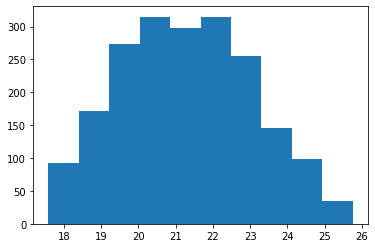

In [11]:
plt.hist(g_mag)

In [20]:
g_abs = g_mag - 25 - 5 * np.log10(dist)

# average over g-i and g-r results
log_ML_g = np.array(1.297 * gi_color - 0.855)

M_g = -0.4 * (g_abs - 5.03) + log_ML_g

In [21]:
R_e_phys = R_e / 206265 * dist * 1000

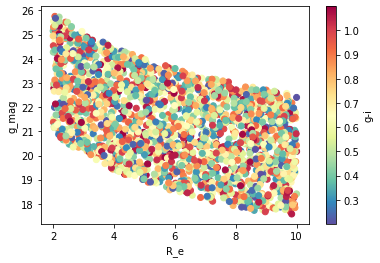

In [35]:
plt.scatter(R_e, g_mag, c=gi_color, cmap='Spectral_r')
plt.xlabel('R_e')
plt.ylabel('g_mag')
plt.colorbar(label='g-i')

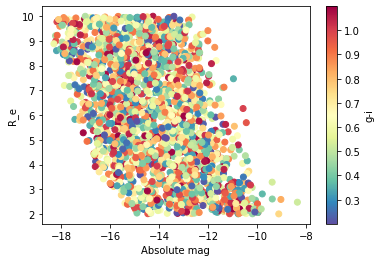

In [36]:
plt.scatter(g_abs, R_e, c=gi_color, cmap='Spectral_r')
plt.ylabel('R_e')
plt.xlabel('Absolute mag')
plt.colorbar(label='g-i')

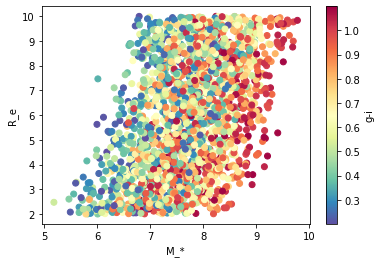

In [34]:
plt.scatter(M_g, R_e, c=gi_color, cmap='Spectral_r')
plt.ylabel('R_e')
plt.xlabel('M_*')
plt.colorbar(label='g-i')

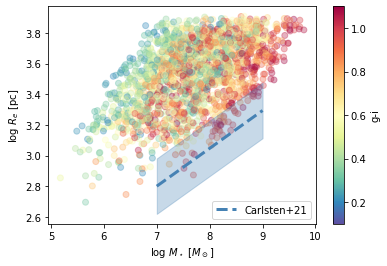

In [23]:
import matplotlib
from matplotlib.colors import Normalize

# norm = Normalize(vmin=2, vmax=15)
# cmap = matplotlib.cm.Spectral_r
# sm = matplotlib.cm.ScalarMappable(norm, cmap)
# sm.set_array([])
# _colors = sm.to_rgba(R_e)
norm = Normalize(vmin=0.1, vmax=1.1)
cmap = matplotlib.cm.Spectral_r
sm = matplotlib.cm.ScalarMappable(norm, cmap)
sm.set_array([])
_colors = sm.to_rgba(gi_color)

sct = plt.scatter(
        M_g, 
        np.log10(R_e_phys) + 3, # in pc
#         xerr=M_g_std[i],
#         yerr=yerrs[:, i].reshape(-1, 1),
        color=_colors,
#         fmt='o', 
        alpha=0.35)
plt.colorbar(sm, label='g-i')

# Carlsten mass-size relation
def mass_size_carlsten(log_m):
    return 1.071 + 0.247 * log_m
x = np.linspace(7, 9)
plt.fill_between(x, mass_size_carlsten(x) - 0.181, 
                 mass_size_carlsten(x) + 0.181, 
                 color='steelblue', alpha=0.3)
plt.plot(x, mass_size_carlsten(x), ls='--', 
         color='steelblue', lw=3, label='Carlsten+21')

plt.xlabel(r'$\log\ M_\star\ [M_\odot]$')
plt.ylabel(r'$\log\ R_{e}\ [\rm pc]$')
plt.legend(loc='lower right')

# plt.xlim(6.8, 9.2)

In [24]:
from scipy.stats import binned_statistic
red = (gi_color > 0.7)
quench_frac, edges, _ = binned_statistic(M_g, red.astype(float), 
                                             statistic='mean', range=(6, 9), bins=12)
num, edges, _ = binned_statistic(M_g, red.astype(float), 
                                             statistic='count', range=(6, 9), bins=12)

Text(0, 0.5, 'Quenched Fraction ($g - i > 0.8$)')

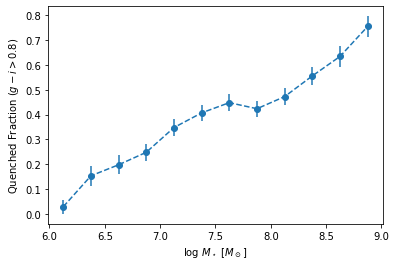

In [25]:
plt.errorbar((edges[:-1] + edges[1:]) / 2, 
             quench_frac, yerr=np.sqrt(quench_frac * (1 - quench_frac) / num), fmt='o--')
plt.xlabel(r'$\log\ M_\star\ [M_\odot]$')
plt.ylabel(r'Quenched Fraction ($g - i > 0.8$)')

### GAMA mass-size relation for late-type galaxies

In [996]:
from kuaizi.kcor import calc_kcor

In [1017]:
## mass function from GAMA: https://academic.oup.com/mnras/article/470/1/283/3815542
def double_schechter(log_M, log_M_0, phi1, phi2, alpha1, alpha2):
    return np.log(10) * np.exp(-10**(log_M -log_M_0)) * (
        (phi1 * (10**(log_M -log_M_0))**(alpha1 + 1)
        ) + (phi2 * (10**(log_M - log_M_0))**(alpha2 + 1)))

In [1018]:
from scipy.stats import rv_continuous, rv_histogram
from astropy.cosmology import Planck15

In [1019]:
edges = np.histogram_bin_edges(None, bins=50, range=(8, 12)).astype(float)
# https://academic.oup.com/mnras/article/459/2/2150/2595150
# IN Weigel et al., supscript 1 and 2 are opposite to other literature

# hist = double_schechter(0.5 * (edges[1:] + edges[:-1]), 
#                         10.78, 2.93 * 1e-3, 0.63 * 1e-3, -0.62, -1.5) # total SMF

hist = double_schechter(0.5 * (edges[1:] + edges[:-1]), 
                        10.67, 1.36 * 1e-3, 0.1 * 1e-3, -0.95, -1.82) # late-types
rv = rv_histogram((hist, edges))

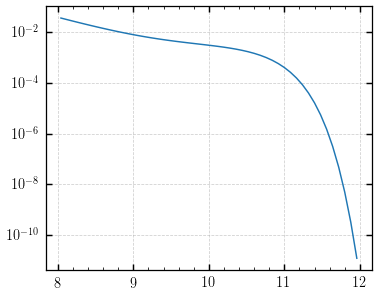

In [1020]:
hist = double_schechter(0.5 * (edges[1:] + edges[:-1]), 
                        10.67, 1.36 * 1e-3, 0.1 * 1e-3, -0.95, -1.82)
rv = rv_histogram((hist, edges))
plt.plot(0.5 * (edges[1:] + edges[:-1]), hist)
plt.yscale('log')
plt.grid('on')

In [1021]:
log_m_star = rv.rvs(size=100000) #slow
R_e_phys = 10**(np.log10(31.15 * 1e-3) + 0.21 * log_m_star + np.random.normal(0, 0.2, size=(len(log_m_star))))

In [1022]:
np.median(np.histogram(log_m_star, bins=edges)[0] / (hist * Planck15.comoving_volume(0.5).value * 28 / 40000))

0.014776562047229356

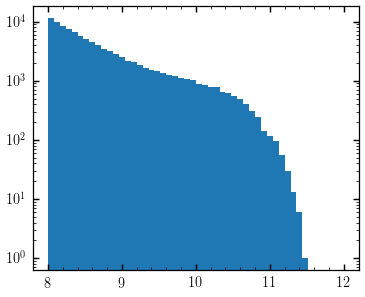

In [1023]:
plt.hist(log_m_star, bins=edges)
plt.yscale('log')

In [1025]:
edges = np.histogram_bin_edges(None, bins=50, range=(0, 0.5)).astype(float)
hist = (Planck15.comoving_volume(0.5 * (edges[1:] + edges[:-1])).value / 1e6)
rv = rv_histogram((hist, edges))

In [1026]:
redshift = rv.rvs(size=len(log_m_star)) #slow

In [1027]:
# gi_color = np.random.choice([0.3, 0.4, 0.5], size=len(redshift))
gi_color = np.random.normal(0.4, 0.08, size=len(redshift))
gi_color += calc_kcor('g', redshift, 'g - i', gi_color) - calc_kcor('i', redshift, 'g - i', gi_color)
# [K_corr(z, gi) for z, gi in zip(redshift, gi_color)]

In [1028]:
# gi_color = K_corr(redshift) + 0.4
# gi_color = np.ones_like(redshift) + 0.4

In [1029]:
ang_dist = Planck15.angular_diameter_distance(redshift).value
lum_dist = Planck15.luminosity_distance(redshift).value

In [1030]:
R_e_ang = R_e_phys * 1e-3 / ang_dist * 206265

In [1031]:
log_ML_g = (1.297 * gi_color - 0.855)
g_abs = (log_m_star - log_ML_g) / (-0.4) + 5.03
g_mag = g_abs + 25 + 5 * np.log10(lum_dist)
SB_eff_avg = g_mag + 2.5 * np.log10(2 * np.pi * R_e_ang**2) + 2.5 * 4 * np.log10(1 + redshift)

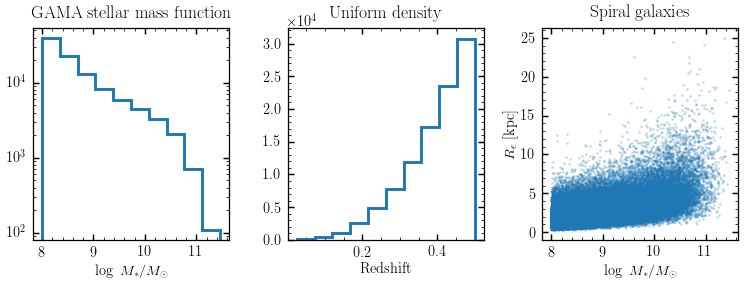

In [1032]:
import kuaizi
kuaizi.set_matplotlib(style='JL', usetex=True, fontsize=15, dpi=70)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(13, 4))

ax1.hist(log_m_star, histtype='step', lw=3)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\log\ M_*/M_\odot$')
ax1.set_title('GAMA stellar mass function')

ax2.hist(redshift, histtype='step', lw=3)
ax2.set_xlabel(r'Redshift')
ax2.set_title('Uniform density')

sct = ax3.scatter(log_m_star, R_e_phys, s=3, alpha=0.2)
ax3.set_xlabel(r'$\log\ M_*/M_\odot$')
ax3.set_ylabel("$R_e$ [kpc]")
# ax3.text(10.4, 16, 'GAMA Mass-size relation', ha='center')
ax3.set_title('Spiral galaxies')

plt.subplots_adjust(wspace=0.3)

In [1033]:
from matplotlib.patches import Rectangle

(0.0, 5.0)

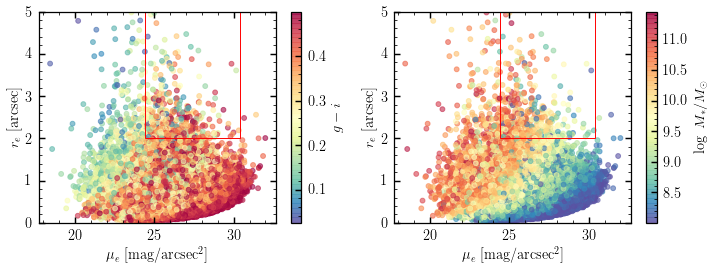

In [1034]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax1)
plt.scatter(SB_eff_avg, R_e_ang, 
            c=redshift, 
            alpha=0.6, s=25, 
#             vmin=0.3, vmax=1.0,
            cmap='Spectral_r')
plt.xlabel(r'$\mu_{e}$ [mag/arcsec$^2$]')
plt.ylabel('$r_e$ [arcsec]')
plt.colorbar(label='$g-i$')

# plt.scatter(udg_cat['SB_eff_avg'][:, 0], 
#             udg_cat['rhalf_circularized'] * 0.168, 
#             c=(udg_cat['mag'][:, 0] - udg_cat['mag'][:, 2]).data,
#             cmap='Spectral_r',
#             edgecolors='k',
#             label='UDG',
#             vmin=0.3, vmax=1.0,
#             s=15, alpha=0.4)

# Create a Rectangle patch
rect = Rectangle((24.4, 2.0), 6, 8, linewidth=1, edgecolor='r', facecolor='none')
ax1.add_patch(rect)


plt.ylim(0, 5)

plt.sca(ax2)
plt.scatter(SB_eff_avg, R_e_ang, c=log_m_star, alpha=0.6, s=25, cmap='Spectral_r')
plt.xlabel(r'$\mu_{e}$ [mag/arcsec$^2$]')
plt.ylabel('$r_e$ [arcsec]')
plt.colorbar(label=r'$\log\ M_*/M_\odot$')

rect = Rectangle((24.4, 2.0), 6, 8, linewidth=1, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

plt.ylim(0, 5)

In [1035]:
flag = (SB_eff_avg > 24.4) & (R_e_ang > 2)

In [1036]:
np.sum(flag)

466

(array([  5.,   8.,  13.,  18.,  45.,  85., 151.,  91.,  41.,   9.]),
 array([0.39581222, 0.44474519, 0.49367816, 0.54261113, 0.5915441 ,
        0.64047707, 0.68941004, 0.73834301, 0.78727598, 0.83620895,
        0.88514191]),
 <BarContainer object of 10 artists>)

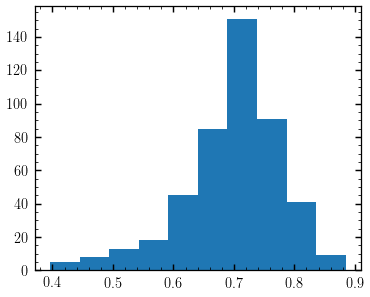

In [1037]:
plt.hist(gi_color[flag])

In [1038]:
udg_cat = Table.read('/tigress/jiaxuanl/public_html/galary/catalogs/nsa_z001_004/udg_z001_004_spergel_after_viz.fits')
host_dist = np.unique(udg_cat['host_ang_diam_dist'].data)
_dist = np.random.choice(host_dist, size=np.sum(flag))

R_e_phys = R_e_ang[flag] / 206265 * _dist * 1000
log_m_star_app = -0.4 * (g_mag[flag] - 25 - 5 * np.log10(_dist) - 5.03) + (1.297 * gi_color[flag] - 0.855)

flag1 = (R_e_phys > 1.5) # udg
# flag1 = (np.log10(R_e_phys) + 3 - mass_size_carlsten(log_m_star_app)) > 0.2

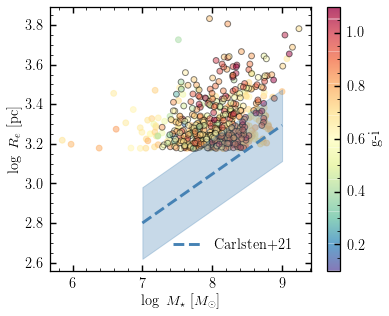

In [1043]:
import matplotlib
from matplotlib.colors import Normalize

sct = plt.scatter(
        log_m_star_app[flag1], 
        np.log10(R_e_phys[flag1]) + 3,
        c=gi_color[flag][flag1],
        vmin=0.1, vmax=1.1,
        alpha=0.5, cmap='Spectral_r')

sct = plt.scatter(
        udg_cat['log_m_star'], 
        np.log10(udg_cat['rhalf_phys']) + 3,
        c=udg_cat['mag'][:, 0] - udg_cat['mag'][:, 2],
        vmin=0.1, vmax=1.1,
    edgecolors='k',
        alpha=0.5, cmap='Spectral_r')


plt.colorbar(sct, label='g-i')

# Carlsten mass-size relation
def mass_size_carlsten(log_m):
    return 1.071 + 0.247 * log_m
x = np.linspace(7, 9)
plt.fill_between(x, mass_size_carlsten(x) - 0.181, 
                 mass_size_carlsten(x) + 0.181, 
                 color='steelblue', alpha=0.3)
plt.plot(x, mass_size_carlsten(x), ls='--', 
         color='steelblue', lw=3, label='Carlsten+21')

plt.xlabel(r'$\log\ M_\star\ [M_\odot]$')
plt.ylabel(r'$\log\ R_{e}\ [\rm pc]$')
plt.legend(loc='lower right')

# plt.xlim(6.8, 9.2)

In [1050]:
fake_udg_cat = Table.read('/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Catalog/random_test.fits')[:100]

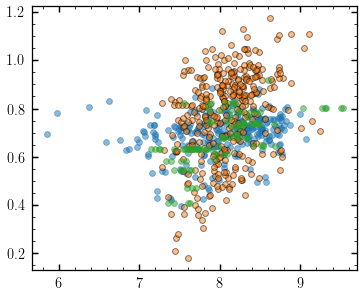

In [1051]:
sct = plt.scatter(
        log_m_star_app[flag1], 
        gi_color[flag][flag1],
#         vmin=0.1, vmax=1.1,
        alpha=0.5, cmap='Spectral_r')

sct = plt.scatter(
        udg_cat['log_m_star'], 
        udg_cat['mag'][:, 0] - udg_cat['mag'][:, 2],
#         vmin=0.1, vmax=1.1,
    edgecolors='k',
        alpha=0.5, cmap='Spectral_r')

sct = plt.scatter(
        fake_udg_cat['log_m_star'], 
        fake_udg_cat['mag'][:, 0] - fake_udg_cat['mag'][:, 2],
#         vmin=0.1, vmax=1.1,
#     edgecolors='k',
        alpha=0.5, cmap='Spectral_r')

In [ ]:
udg_cat[]

(array([0.08561818, 0.19977576, 0.48516971, 0.91326064, 1.31281217,
        1.62674551, 2.16899402, 2.34023039, 0.68494548, 0.22831516]),
 array([0.17954107, 0.27908449, 0.37862792, 0.47817134, 0.57771477,
        0.67725819, 0.77680161, 0.87634504, 0.97588846, 1.07543189,
        1.17497531]),
 <BarContainer object of 10 artists>)

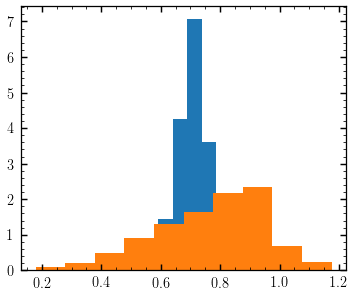

In [1040]:
plt.hist(gi_color[flag][flag1], density=True)

plt.hist(udg_cat['mag'][:, 0] - udg_cat['mag'][:, 2], density=True)

Text(0, 0.5, 'Quenched Fraction ($g - i > 0.8$)')

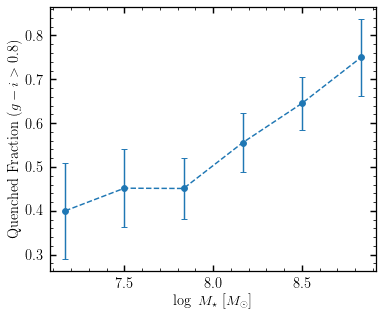

In [1041]:
red = (gi_color[flag][flag1] > 0.7)
quench_frac, edges, _ = binned_statistic(log_m_star_app[flag1], red.astype(float), 
                                             statistic='mean', range=(7, 9), bins=6)
num, edges, _ = binned_statistic(log_m_star_app[flag1], red.astype(float), 
                                             statistic='count', range=(7, 9), bins=6)
plt.errorbar((edges[:-1] + edges[1:]) / 2, 
             quench_frac, yerr=np.sqrt(quench_frac * (1 - quench_frac) / num), fmt='o--')
plt.xlabel(r'$\log\ M_\star\ [M_\odot]$')
plt.ylabel(r'Quenched Fraction ($g - i > 0.8$)')

In [ ]:
# g_mag = 21.0995
# g-i=0.6516849808088778
# SB = 24.729654817701302
# r = 2.14 arcsec